Exercise 1: Implement Simple Linear Regression

Use the computers.csv dataset and perform the following activities:

Dataset contains the details of time taken to repair a computer, given the number of units to be repaired.

In [1]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import sklearn;

In [3]:
computers = pd.read_csv("Datasets/computers.csv");

FileNotFoundError: [Errno 2] No such file or directory: 'Datasets/computers.csv'

In [ ]:
computers.info();


NameError: name 'computers' is not defined

In [ ]:
computers.head()

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [ ]:
computers.isna().sum()

Units      0
Minutes    0
dtype: int64

In [ ]:
mean_values = computers['Minutes'].mean()
mean_values

np.float64(97.21428571428571)

Text(0, 0.5, "['Minutes']")

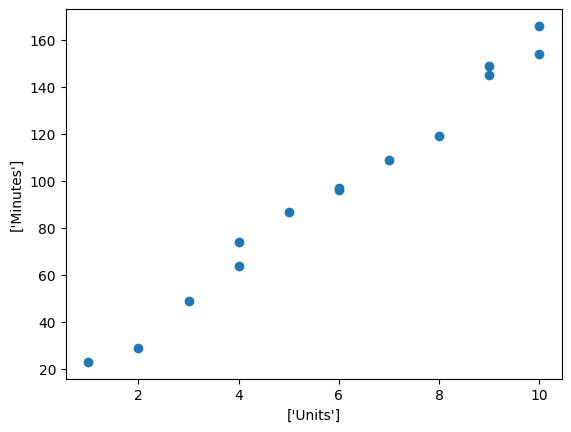

In [ ]:
plt.scatter(computers['Units'],computers['Minutes'])
plt.xlabel(['Units'])
plt.ylabel(['Minutes'])

In [ ]:
model0 = computers['Minutes'].mean()

In [ ]:
model1 = 10 + 12 * computers['Units']

In [ ]:
model2 = 6 + 18 * computers['Units']

In [ ]:
computers['model_0'] = model0
computers['model_1'] = model1
computers['model_2'] = model2

In [ ]:
computers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Units    14 non-null     int64  
 1   Minutes  14 non-null     int64  
 2   model_0  14 non-null     float64
 3   model_1  14 non-null     int64  
 4   model_2  14 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 692.0 bytes


In [ ]:
computers

,Units,Minutes,model_0,model_1,model_2
0,1,23,97.214286,22,24
1,2,29,97.214286,34,42
2,3,49,97.214286,46,60
3,4,64,97.214286,58,78
4,4,74,97.214286,58,78
5,5,87,97.214286,70,96
6,6,96,97.214286,82,114
7,6,97,97.214286,82,114
8,7,109,97.214286,94,132
9,8,119,97.214286,106,150


KeyError: 'model_3'

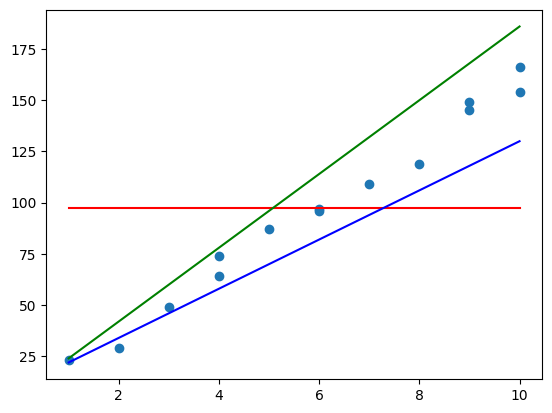

In [ ]:
fig,ax = plt.subplots()
ax.scatter(x='Units', y='Minutes', data=computers, label='Actual repair time')
ax.plot(computers['Units'], computers['model_0'], color='red', label = 'model0')
ax.plot(computers['Units'], computers['model_1'], color='blue', label = 'model1')
ax.plot(computers['Units'], computers['model_2'], color='green', label = 'model2')
ax.plot(computers['Units'], computers['model_3'], color='orange', label = 'model3')

In [ ]:

ax.scatter(x='Units', y='Minutes', data=computers, label='Actual repair time')
ax.plot(computers['Units'], computers[model0], color='red', label = model0)

KeyError: np.float64(97.21428571428571)

Building Regression model using Scikit learn Library

In [ ]:
X = computers[['Units']]
Y = computers['Minutes']
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()
model3.fit(X,Y)
print("Intercept:", model3.intercept_)
print("Coefficients:" , model3.coef_)

Intercept: 4.161654135338296
Coefficients: [15.50877193]


In [ ]:
model_3 = 4.16 + 15.50 * computers['Units']         # model3 using
computers['model_3'] = model_3
computers

,Units,Minutes,model_0,model_1,model_2,model_3
0,1,23,97.214286,22,24,19.66
1,2,29,97.214286,34,42,35.16
2,3,49,97.214286,46,60,50.66
3,4,64,97.214286,58,78,66.16
4,4,74,97.214286,58,78,66.16
5,5,87,97.214286,70,96,81.66
6,6,96,97.214286,82,114,97.16
7,6,97,97.214286,82,114,97.16
8,7,109,97.214286,94,132,112.66
9,8,119,97.214286,106,150,128.16


In [ ]:
ax.plot(computers['Units'], computers['model_3'], color='orange', label = 'model3')

In [ ]:
rsq = model3.score(computers[['Units']],Y) * 100
rsq

98.74371980620737

Exercise 2: Multiple Linear Regression Model

std_marks_data.csv

To understand Multiple Linear Regression, let us consider the student marks dataset.



This model helps us to predict the marks of the students using the previous dataset.

The inputs are hours(time spent to study) ,age(present age) and internet(weather the internet is available or not), by using these 3 input fields we are predicting the marks of the students.

In [ ]:
students = pd.read_csv("Datasets/std_marks_data.csv");

In [ ]:
students

,hours,age,internet,marks
0,6.84,15,0,78.64
1,6.56,20,1,88.80
2,NaN,21,1,88.90
3,8.67,22,1,98.99
4,7.55,17,1,92.34
...,...,...,...,...
295,2.99,25,0,43.45
296,6.55,15,1,77.74
297,0.00,20,1,75.76
298,9.90,22,0,99.99


In [ ]:
students.head()

,hours,age,internet,marks
0,6.84,15,0,78.64
1,6.56,20,1,88.80
2,NaN,21,1,88.90
3,8.67,22,1,98.99
4,7.55,17,1,92.34


In [ ]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   hours     288 non-null    float64
 1   age       300 non-null    int64  
 2   internet  300 non-null    int64  
 3   marks     300 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 9.5 KB


In [ ]:
students.isna().sum()

hours       12
age          0
internet     0
marks        0
dtype: int64

In [ ]:
students['hours'] = pd.to_numeric(students['hours'], errors='coerce')
students['hours'] = students['hours'].fillna(students['hours'].mean())

In [ ]:
X = students.iloc[3:,:-1].values

In [ ]:
X

array([[ 8.67      , 22.        ,  1.        ],
       [ 7.55      , 17.        ,  1.        ],
       [ 8.8       , 16.        ,  0.        ],
       [ 8.76      , 24.        ,  0.        ],
       [ 7.44      , 25.        ,  0.        ],
       [ 1.23      , 21.        ,  1.        ],
       [ 4.24      , 16.        ,  0.        ],
       [ 3.85      , 15.        ,  1.        ],
       [ 6.4       , 17.        ,  0.        ],
       [ 4.        , 16.        ,  1.        ],
       [ 6.8       , 18.        ,  0.        ],
       [ 6.2       , 18.        ,  1.        ],
       [ 1.7       , 20.        ,  1.        ],
       [ 0.5       , 21.        ,  1.        ],
       [ 5.34      , 22.        ,  1.        ],
       [ 5.67      , 23.        ,  0.        ],
       [ 4.8       , 24.        ,  0.        ],
       [ 2.99      , 25.        ,  1.        ],
       [ 6.55      , 21.        ,  0.        ],
       [ 9.33      , 16.        ,  1.        ],
       [ 4.44      , 18.        ,  0.   

In [ ]:
X.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [ ]:
X

array([[ 8.67      , 22.        ,  1.        ],
       [ 7.55      , 17.        ,  1.        ],
       [ 8.8       , 16.        ,  0.        ],
       [ 8.76      , 24.        ,  0.        ],
       [ 7.44      , 25.        ,  0.        ],
       [ 1.23      , 21.        ,  1.        ],
       [ 4.24      , 16.        ,  0.        ],
       [ 3.85      , 15.        ,  1.        ],
       [ 6.4       , 17.        ,  0.        ],
       [ 4.        , 16.        ,  1.        ],
       [ 6.8       , 18.        ,  0.        ],
       [ 6.2       , 18.        ,  1.        ],
       [ 1.7       , 20.        ,  1.        ],
       [ 0.5       , 21.        ,  1.        ],
       [ 5.34      , 22.        ,  1.        ],
       [ 5.67      , 23.        ,  0.        ],
       [ 4.8       , 24.        ,  0.        ],
       [ 2.99      , 25.        ,  1.        ],
       [ 6.55      , 21.        ,  0.        ],
       [ 9.33      , 16.        ,  1.        ],
       [ 4.44      , 18.        ,  0.   

In [ ]:
Y = students.iloc[3:,-1]

In [ ]:
Y

3      98.99
4      92.34
5      50.30
6      43.45
7      77.74
       ...  
295    43.45
296    77.74
297    75.76
298    99.99
299    99.99
Name: marks, Length: 297, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
X_train.shape

(237, 3)

In [ ]:
X_test.shape

(60, 3)

In [ ]:
Y_train.shape

(237,)

In [ ]:
Y_test.shape

(60,)

In [ ]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression()
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
print("Intercept=", model.intercept_,"\nCoeficient=", model.coef_);

Intercept= 61.95182022358155 
Coeficient= [1.14025919 0.2254307  1.92113085]


In [ ]:
hours = int(input("Enter study hours:"))
age = int(input("Enter age :"))
internet = int(input("enter internet is available or not(0/1)"))
data = [[hours, age, internet]]
print("Predicted:", model.predict(data))


KeyboardInterrupt: Interrupted by user

Exercise 3: Build Logistic Regression Model

Consider a coronary heart disease dataset (chd_data.csv) which lists the age in years ('age') and the presence/absence of evidence of significant coronary heart disease ('chd') for 100 patients.

The variable chd = 0 indicates the absence of coronary heart disease, whereas chd=1 indicates the presence of coronary heart disease.

In [ ]:
chd = pd.read_csv("Datasets/chd_data.csv");

In [ ]:
chd

,age,chd
0,20,0
1,23,0
2,24,0
3,25,1
4,25,0
...,...,...
95,63,1
96,64,1
97,64,0
98,65,1


In [ ]:
chd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     100 non-null    int64
 1   chd     100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [ ]:
chd.isna().sum()

age    0
chd    0
dtype: int64

In [ ]:
chd.head()

,age,chd
0,20,0
1,23,0
2,24,0
3,25,1
4,25,0


In [ ]:
chd.tail()

,age,chd
95,63,1
96,64,1
97,64,0
98,65,1
99,69,1


Text(0.5, 1.0, 'Age vs. Coronary heart disease')

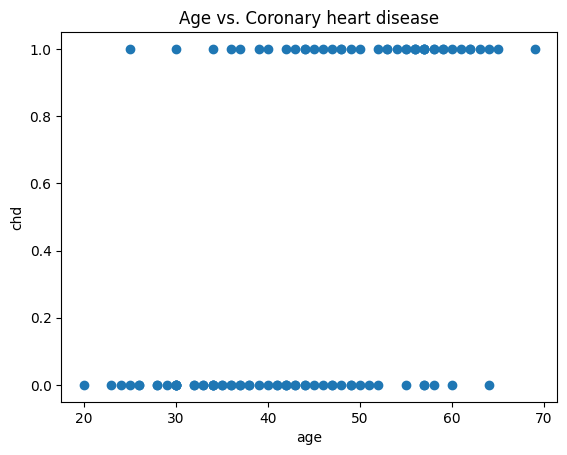

In [ ]:
# importring the required library
import matplotlib.pyplot as plt
%matplotlib inline
# ploating the 'chd' values against 'age' values
plt.scatter("age", "chd", data=chd)
plt.xlabel("age")
plt.ylabel("chd")
plt.title("Age vs. Coronary heart disease")

In [ ]:
from sklearn.model_selection import train_test_split

# predictor and target
predictors = ["age"]
target = ["chd"]

X = chd[["age"]]     # 2D (features)
y = chd["chd"]       # 1D (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (70, 1)
Shape of y_train: (70,)
Shape of X_test: (30, 1)
Shape of y_test: (30,)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
print("Intercept:", model.intercept_, "\n Coefficient:", model.coef_)

Intercept: [-5.6511192] 
 Coefficient: [[0.11144141]]


In [ ]:
# test = int(input("Enter age:"))
# data = [[test]]
model.score(X_train, y_train)
model.score(X_test, y_test)

0.7333333333333333

In [ ]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


Accuracy : 0.7333333333333333
Precision: 0.9090909090909091
Recall   : 0.5882352941176471
F1 Score : 0.7142857142857143
              precision    recall  f1-score   support

           0       0.63      0.92      0.75        13
           1       0.91      0.59      0.71        17

    accuracy                           0.73        30
   macro avg       0.77      0.76      0.73        30
weighted avg       0.79      0.73      0.73        30

